In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [6]:
X = iris.data
Y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names
print(feature_names, target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(150, 4) (150,) (90, 4) (60, 4) (90,) (60,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predict_dt = dt.predict(X_test)

In [21]:
from sklearn import metrics

print(f'KNN:- {metrics.accuracy_score(Y_predict, Y_test)}')
print(f'DT:- {metrics.accuracy_score(Y_predict_dt, Y_test)}')

KNN:- 0.9666666666666667
DT:- 0.95


In [22]:
sample = [[3,1,2,3], [1,5,2,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print(pred_species)

['versicolor', 'setosa']


To copy the model to a file:-

In [23]:
from sklearn.externals import joblib

joblib.dump(knn, 'mlmodel.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['mlmodel.joblib']

Example on how to use machine learning model:-

In [26]:
model = joblib.load('mlmodel.joblib')
model_predictions = model.predict(sample)
species = [iris.target_names[p] for p in model_predictions]
print(species)

['versicolor', 'setosa']


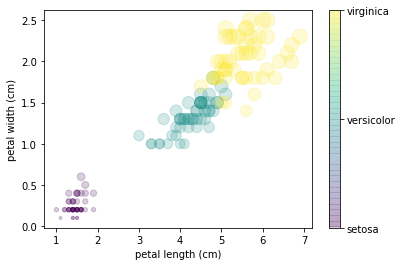

In [29]:
import matplotlib.pyplot as plt
features = iris.data.T

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)